In [1]:
import helper
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100.0%
100.0%
100.0%
100.0%


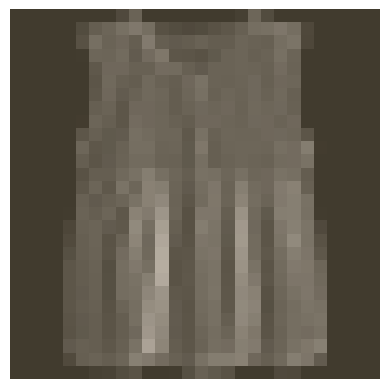

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :]);

## Building the network

In [ ]:
# TODO: Define your network architecture here
from torch import nn

model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1),
)

## Train the network

In [4]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
# TODO: Train the network here
epochs = 5
for _ in range(epochs):
    running_loss = 0
    for images, labels in trainloader:  # noqa: B007
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # TODO: Training pass
        output = model(images)
        loss = criterion(output, labels)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    else:
        print(f"Training loss: {running_loss / len(trainloader)}")

Training loss: 1.0330563147883933
Training loss: 0.5688244614646887
Training loss: 0.4971115820284591
Training loss: 0.4621540311175877
Training loss: 0.4390218921784145


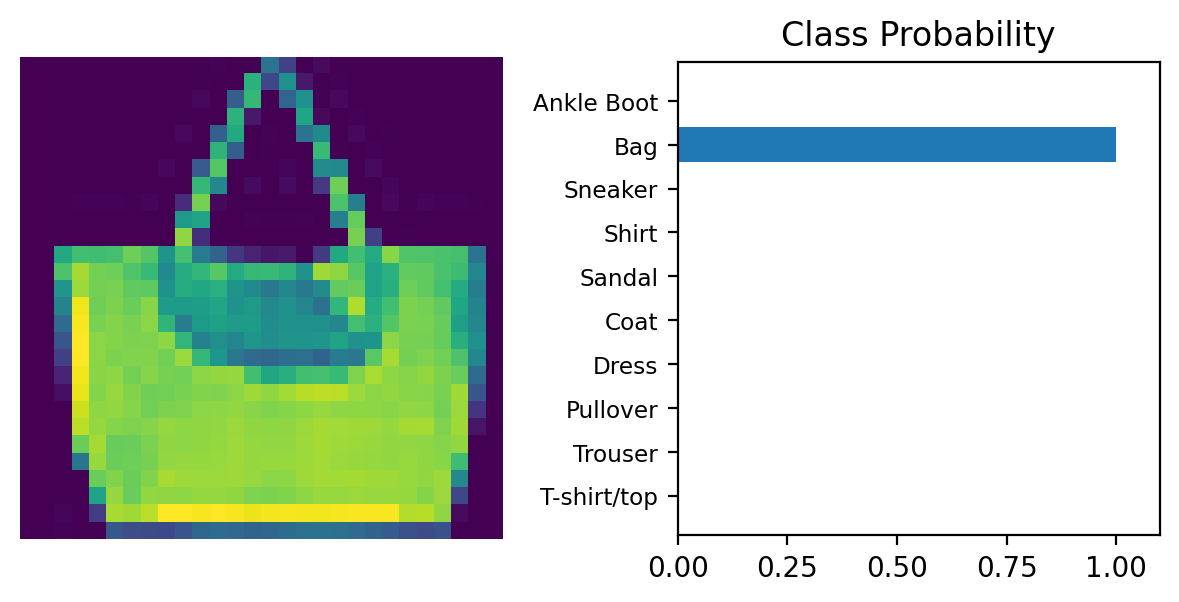

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import matplotlib.pyplot as plt

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version="Fashion")
plt.show()